In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal
from random import randrange

In [38]:
def generate_synthetic_data(sigma):
    mu_a, mu_b, mu_c = np.array([-1, -1]), np.array([1, -1]), np.array([0, 1])
    cov_a, cov_b, cov_c = sigma * np.array([[2, 0.5], [0.5, 1]]), sigma * np.array([[1, -0.5], [-0.5, 2]]), sigma * np.array([[1, 0], [0, 2]])

    data_a = np.random.multivariate_normal(mu_a, cov_a, 100)
    data_b = np.random.multivariate_normal(mu_b, cov_b, 100)
    data_c = np.random.multivariate_normal(mu_c, cov_c, 100)

    return np.vstack((data_a, data_b, data_c))


In [39]:
# Implement K-means clustering
def kmeans_clustering(data):
    centroids = data[np.random.choice(data.shape[0], 3, replace=False)]
    iterations = 0
    while iterations < 100:
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(3)])
        centroids = new_centroids
        iterations = iterations+1
    return labels,centroids


# Function to evaluate clustering accuracy
def cal_accuracy(true_labels, predicted_labels):
    mapping = {}
    for i in range(len(true_labels)):
        if len(predicted_labels[true_labels == i]) > 0:
            mapping[i] = np.argmax(np.bincount(predicted_labels[true_labels == i]))

    mapped_labels = [mapping[label] for label in predicted_labels if label in mapping]
    accuracy = accuracy_score(true_labels, mapped_labels)
    return accuracy


In [40]:
def kmeans_objective(data, centroids, labels):
    return np.sum(np.linalg.norm(data - centroids[labels], axis=1)**2)

In [41]:
def plot_clusters(data, labels, centroids, title):
    plt.figure(figsize=(8, 6))

    cluster_colors = ['red', 'blue', 'green']  # Assign specific colors to each cluster

    # Plot data points with cluster colors
    for i, color in zip(range(len(cluster_colors)), cluster_colors):
        cluster_data = data[labels == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=color, label=f'Cluster {i}')

    # Plot centroids in black
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()


def plot_custom_clusters_gmm(data, labels, centroids, title):
    plt.figure(figsize=(8, 6))

    cluster_colors = ['red', 'blue', 'green']  # Assign specific colors to each cluster

    # Plot data points with cluster colors
    for i, color in zip(range(len(cluster_colors)), cluster_colors):
        cluster_data = data[labels == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=color, label=f'Cluster {i}')

    # Plot centroids in black
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()


In [42]:
# Generate synthetic datasets with different sigma values
sigma_values = [0.5, 1, 2, 4, 8]
kmeans_objectives = []
kmeans_accuracies = []
for i, sigma in enumerate(sigma_values):
    data = generate_synthetic_data(sigma)
    true_labels = np.repeat(np.arange(3), 100)

    # K-means clustering
    kmeans_labels,centroids = kmeans_clustering(data)
    kmeans_accuracy = cal_accuracy(true_labels, kmeans_labels)
    kmeans_obj_val = kmeans_objective(data, centroids, kmeans_labels)
    kmeans_objectives.append(kmeans_obj_val)
    kmeans_accuracies.append(kmeans_accuracy)

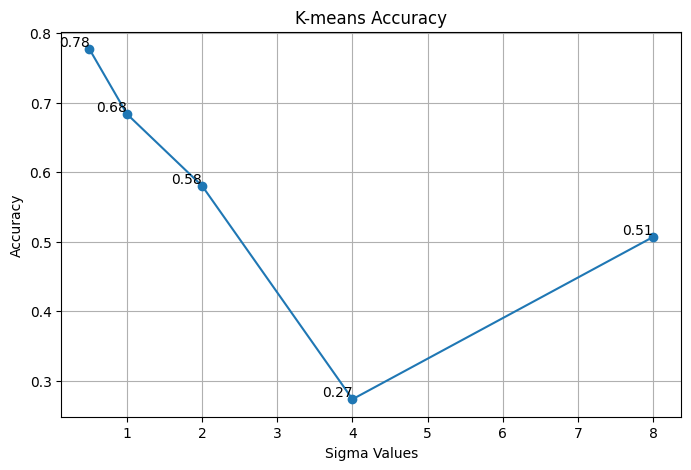

In [43]:
# Plotting K-means accuracies
plt.figure(figsize=(8, 5))
plt.plot(sigma_values, kmeans_accuracies, marker='o')
# Display values on hover
for i, (sigma, accuracy) in enumerate(zip(sigma_values, kmeans_accuracies)):
    plt.text(sigma, accuracy, f'{accuracy:.2f}', ha='right', va='bottom')

plt.title('K-means Accuracy')
plt.xlabel('Sigma Values')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()




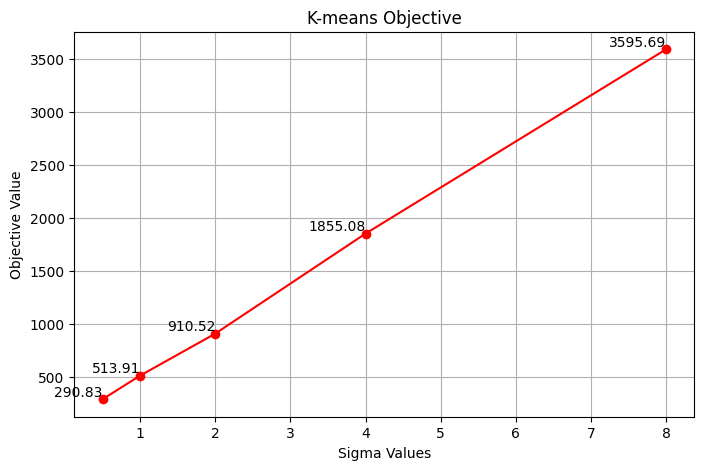

In [44]:
# Plotting K-means objectives
plt.figure(figsize=(8, 5))
plt.plot(sigma_values, kmeans_objectives, marker='o', color='r')
# Display values on hover
for i, (sigma, objective) in enumerate(zip(sigma_values, kmeans_objectives)):
    plt.text(sigma, objective, f'{objective:.2f}', ha='right', va='bottom')

plt.title('K-means Objective')
plt.xlabel('Sigma Values')
plt.ylabel('Objective Value')
plt.grid(True)
plt.show()

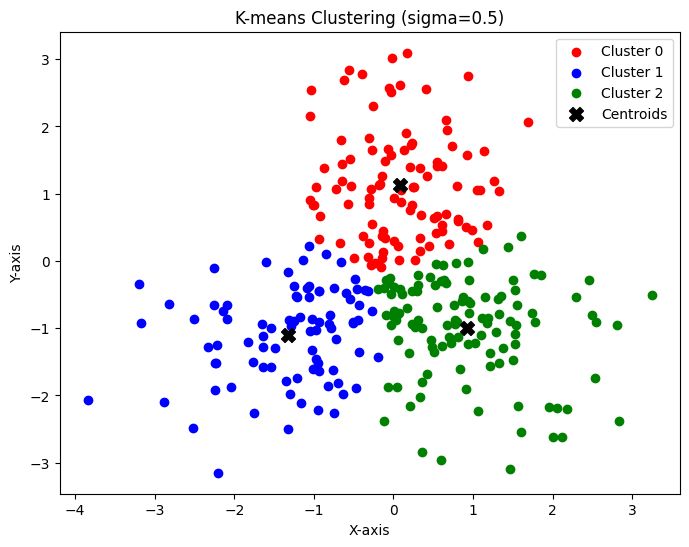

In [45]:
sigma = 0.5
data = generate_synthetic_data(sigma)
true_labels = np.repeat(np.arange(3), 100)

# K-means clustering
kmeans_labels,centroids = kmeans_clustering(data)

# # Plot K-means clustering result
plot_clusters(data, kmeans_labels,centroids, f'K-means Clustering (sigma={sigma})')

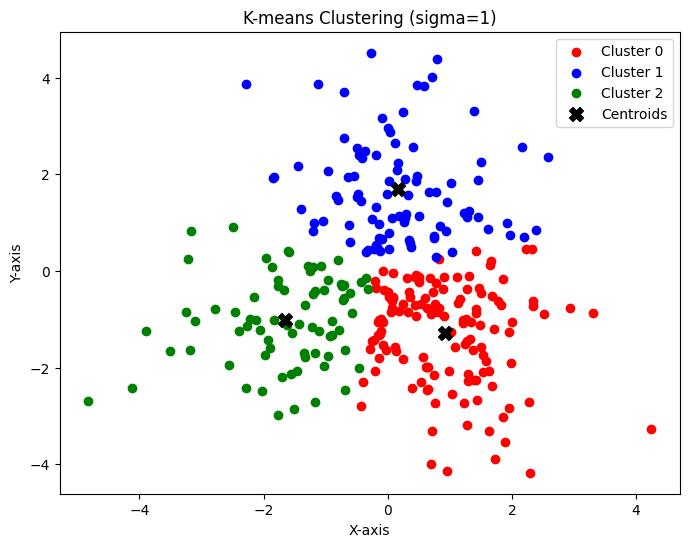

In [46]:
sigma = 1
data = generate_synthetic_data(sigma)
true_labels = np.repeat(np.arange(3), 100)

# K-means clustering
kmeans_labels,centroids = kmeans_clustering(data)

# # Plot K-means clustering result
plot_clusters(data, kmeans_labels,centroids, f'K-means Clustering (sigma={sigma})')

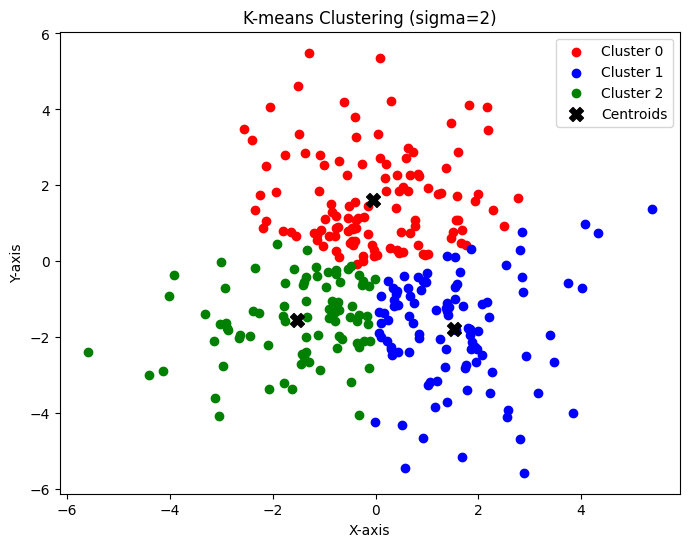

In [47]:
sigma = 2
data = generate_synthetic_data(sigma)
true_labels = np.repeat(np.arange(3), 100)

# K-means clustering
kmeans_labels,centroids = kmeans_clustering(data)

# # Plot K-means clustering result
plot_clusters(data, kmeans_labels,centroids, f'K-means Clustering (sigma={sigma})')

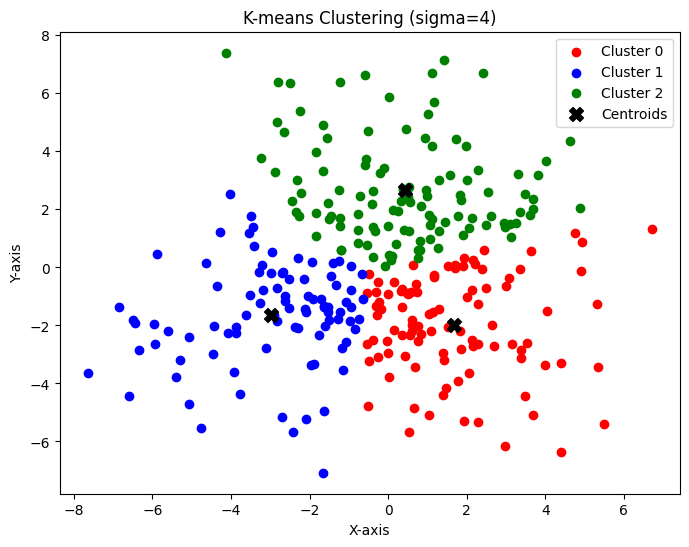

In [48]:
sigma = 4
data = generate_synthetic_data(sigma)
true_labels = np.repeat(np.arange(3), 100)

# K-means clustering
kmeans_labels,centroids = kmeans_clustering(data)

# # Plot K-means clustering result
plot_clusters(data, kmeans_labels,centroids, f'K-means Clustering (sigma={sigma})')

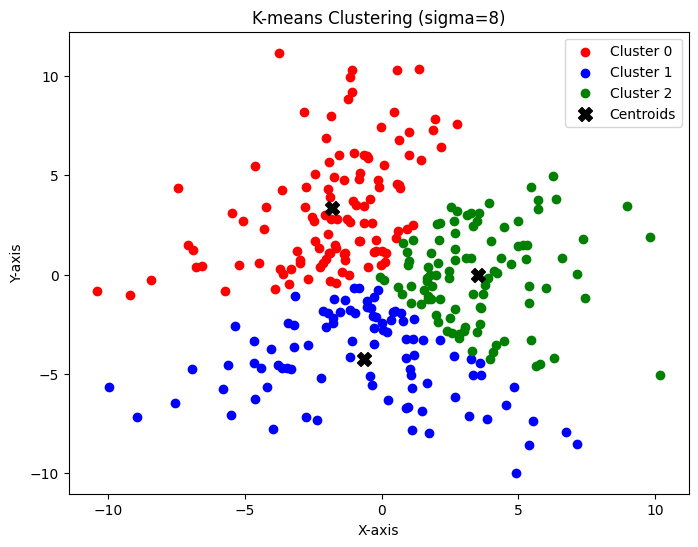

In [49]:
sigma = 8
data = generate_synthetic_data(sigma)
true_labels = np.repeat(np.arange(3), 100)

# K-means clustering
kmeans_labels,centroids = kmeans_clustering(data)

# # Plot K-means clustering result
plot_clusters(data, kmeans_labels,centroids, f'K-means Clustering (sigma={sigma})')

GMM


In [50]:
class GaussianMixtureModel():
    def __init__(self):
        self.feature_1 = None
        self.feature_2 = None
        self.num_clusters = None
        self.log_likelihood = None
        self.means = None
        self.covariances = None
        self.probabilities = None

    def _update_probabilities(self):
        for i in range(self.num_clusters):
            likelihood = multivariate_normal(self.means[i], self.covariances[i]).pdf(np.vstack((self.feature_1, self.feature_2)).T)
            self.probabilities[:, i] = self.weights[i] * likelihood
        self.probabilities = self.probabilities / np.sum(self.probabilities, axis=1, keepdims=True)

    def _update_parameters(self):
        self.weights = np.sum(self.probabilities, axis=0) / len(self.feature_2)
        self.means = np.dot(self.probabilities.T, np.vstack((self.feature_1, self.feature_2)).T) / np.vstack(np.sum(self.probabilities, axis=0))
        for i in range(self.num_clusters):
            dist = np.vstack((self.feature_1, self.feature_2)).T - self.means[i]
            self.covariances[i] = np.dot(self.probabilities[:, i] * dist.T, dist) / np.sum(self.probabilities, axis=0)[i]

    def _log_likelihood(self):
        weight_likelihood = np.zeros((len(self.feature_1), self.num_clusters))
        for i in range(self.num_clusters):
            likelihood = multivariate_normal(self.means[i], self.covariances[i]).pdf(np.vstack((self.feature_1, self.feature_2)).T)
            weight_likelihood[:, i] = self.weights[i] * likelihood
        self.log_likelihood = -np.sum(np.log(np.sum(weight_likelihood, axis=1)))
        return self.log_likelihood

    def cluster(self, num_clusters, feature_1, feature_2):
        self.feature_1 = feature_1
        self.feature_2 = feature_2
        self.num_clusters = num_clusters

        idx = randrange(len(feature_1))
        means = [np.array([feature_1[idx], feature_2[idx]])]
        for i in range(2, num_clusters + 1):
            D = []
            for j in range(0, len(feature_1)):
                D_j_arr = []
                for mu in means:
                    D_j_arr.append((feature_1[j] - mu[0]) ** 2 + (feature_2[j] - mu[1]) ** 2)
                D.append(min(D_j_arr))
            idx_mu = np.argmax(D)
            means.append(np.array([feature_1[idx_mu], feature_2[idx_mu]]))
        self.means = means

        self.covariances = np.full((num_clusters, 2, 2), np.cov(np.vstack((feature_1, feature_2)).T, rowvar=False))

        self.weights = np.ones(num_clusters) / num_clusters

        self.probabilities = np.ones((len(feature_1), num_clusters)) / num_clusters

        prev_log_likelihood, new_log_likelihood = 0, 0
        for i in range(10000):
            self._update_probabilities()
            self._update_parameters()
            new_log_likelihood = self._log_likelihood()
            delta_log_likelihood = prev_log_likelihood - new_log_likelihood
            if abs(delta_log_likelihood) <= 1e-5:
                self.has_converged = True
                break
            prev_log_likelihood = new_log_likelihood

    def get_means(self):
        return self.means

    def get_objective_value(self):
        return self.log_likelihood

    def calculate_accuracy(self, true_labels):
      closest_centroids = [np.argmin([(np.mean(self.feature_1[i * 100:(i + 1) * 100]) - mu[0]) ** 2 + (np.mean(self.feature_2[i * 100:(i + 1) * 100]) - mu[1]) ** 2 for mu in self.means]) for i in range(self.num_clusters)]

      cluster_names = ['a', 'b', 'c']
      predicted_clusters = [cluster_names[closest_centroids[i]] for i in np.argmax(self.probabilities, axis=1)]

      correct_predictions = sum(x == y for x, y in zip(predicted_clusters, true_labels))
      accuracy = correct_predictions / len(true_labels)

      return accuracy

    def get_probabilities(self):
        return self.probabilities

In [51]:
gmm_objectives = []
gmm_accuracies = []

letters = ['a', 'b', 'c']
labels = [l for l in letters for i in range(100)]


for i, sigma in enumerate(sigma_values):
    data = generate_synthetic_data(sigma)
    true_labels = np.repeat(np.arange(3), 100)

    # Custom GMM Clustering
    gmm = GaussianMixtureModel()
    gmm.cluster(3, data[:, 0], data[:, 1])
    gmm_labels = np.argmax(gmm.get_probabilities(), axis=1)
    gmm_objectives.append(gmm.get_objective_value())
    gmm_accuracies.append(gmm.calculate_accuracy(labels))


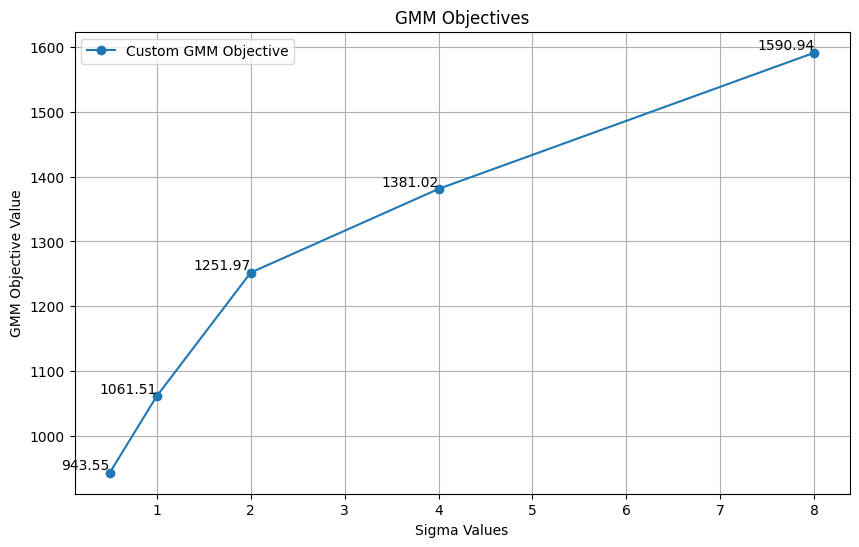

In [52]:
# Plot clustering objectives against variance values for both K-means and GMM
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, gmm_objectives, marker='o', label='Custom GMM Objective')

# Display values on hover
for i, (variance, objective) in enumerate(zip(sigma_values, gmm_objectives)):
    plt.text(variance, objective, f'{objective:.2f}', ha='right', va='bottom')

plt.title('GMM Objectives')
plt.xlabel('Sigma Values')
plt.ylabel('GMM Objective Value')
plt.legend()
plt.grid(True)
plt.show()



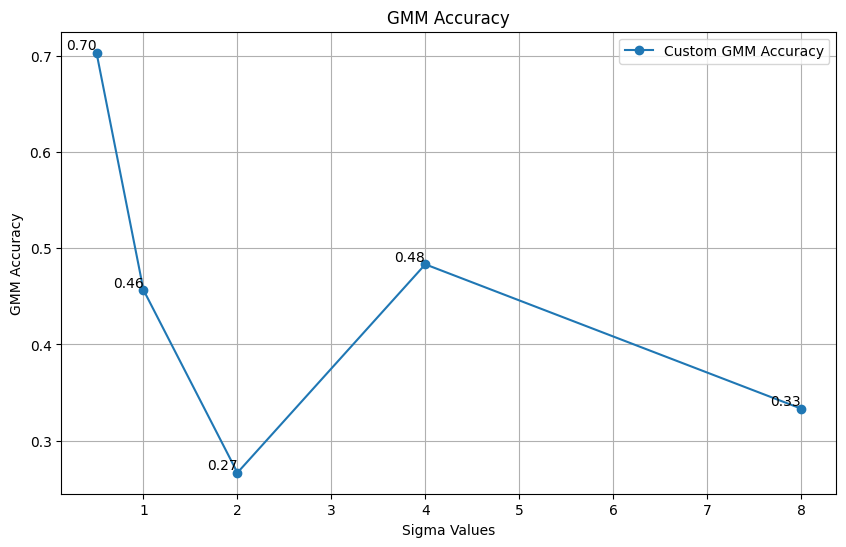

In [53]:
# Plot clustering accuracies against variance values for both K-means and GMM
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, gmm_accuracies, marker='o', label='Custom GMM Accuracy')

# Display values on hover
for i, (variance, accuracy) in enumerate(zip(sigma_values, gmm_accuracies)):
    plt.text(variance, accuracy, f'{accuracy:.2f}', ha='right', va='bottom')

plt.title('GMM Accuracy')
plt.xlabel('Sigma Values')
plt.ylabel('GMM Accuracy')
plt.legend()
plt.grid(True)
plt.show()


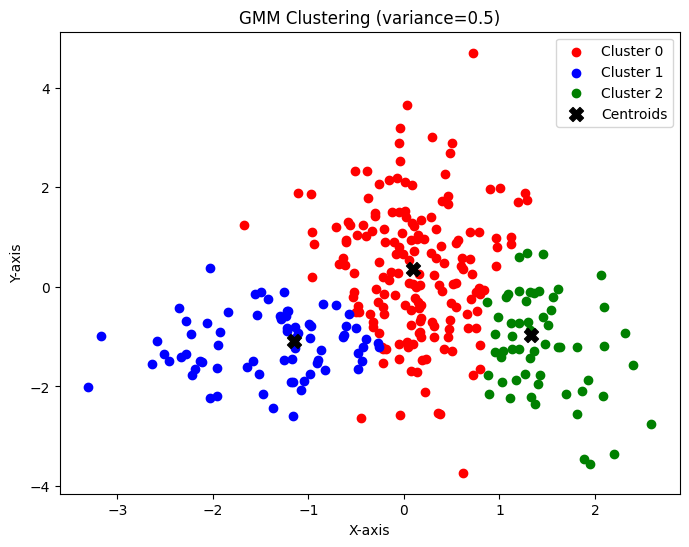

In [54]:
sigma = 0.5
data = generate_synthetic_data(sigma)
letters = ['a', 'b', 'c']
labels = [l for l in letters for i in range(100)]
gmm = GaussianMixtureModel()
gmm.cluster(3, data[:, 0], data[:, 1])
gmm_means = gmm.get_means()
gmm_labels = np.argmax(gmm.get_probabilities(), axis=1)

plot_custom_clusters_gmm(data, gmm_labels, gmm_means, f'GMM Clustering (variance={sigma})')

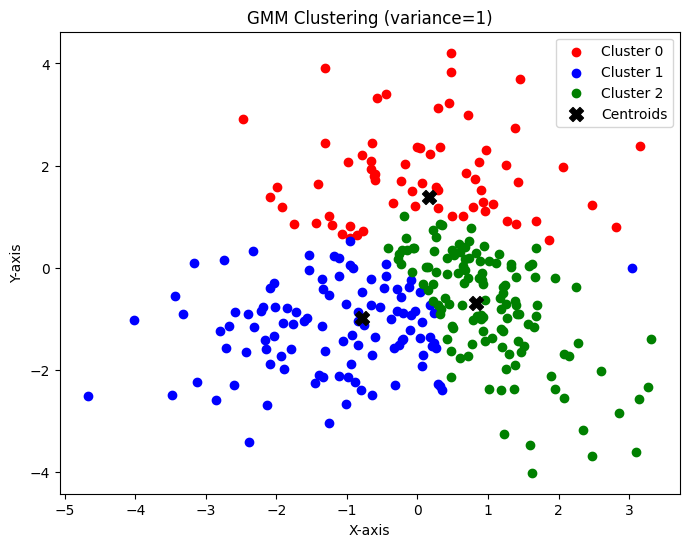

In [55]:
sigma = 1
data = generate_synthetic_data(sigma)
letters = ['a', 'b', 'c']
labels = [l for l in letters for i in range(100)]
gmm = GaussianMixtureModel()
gmm.cluster(3, data[:, 0], data[:, 1])
gmm_means = gmm.get_means()
gmm_labels = np.argmax(gmm.get_probabilities(), axis=1)

plot_custom_clusters_gmm(data, gmm_labels, gmm_means, f'GMM Clustering (variance={sigma})')

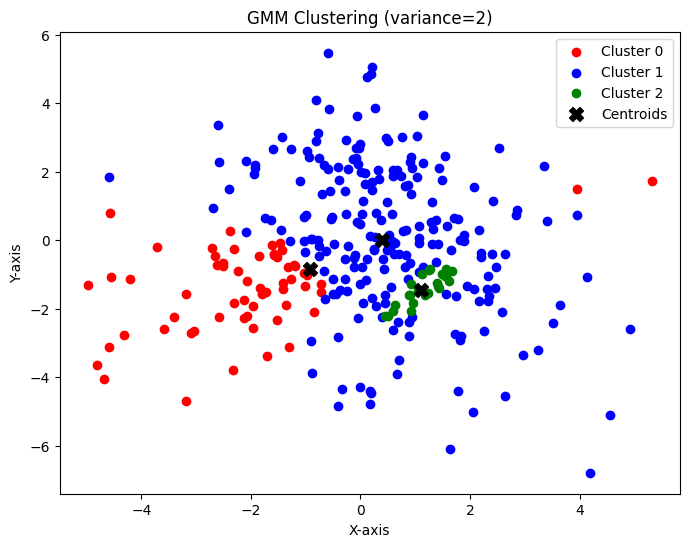

In [56]:
sigma = 2
data = generate_synthetic_data(sigma)
letters = ['a', 'b', 'c']
labels = [l for l in letters for i in range(100)]
gmm = GaussianMixtureModel()
gmm.cluster(3, data[:, 0], data[:, 1])
gmm_means = gmm.get_means()
gmm_labels = np.argmax(gmm.get_probabilities(), axis=1)

plot_custom_clusters_gmm(data, gmm_labels, gmm_means, f'GMM Clustering (variance={sigma})')

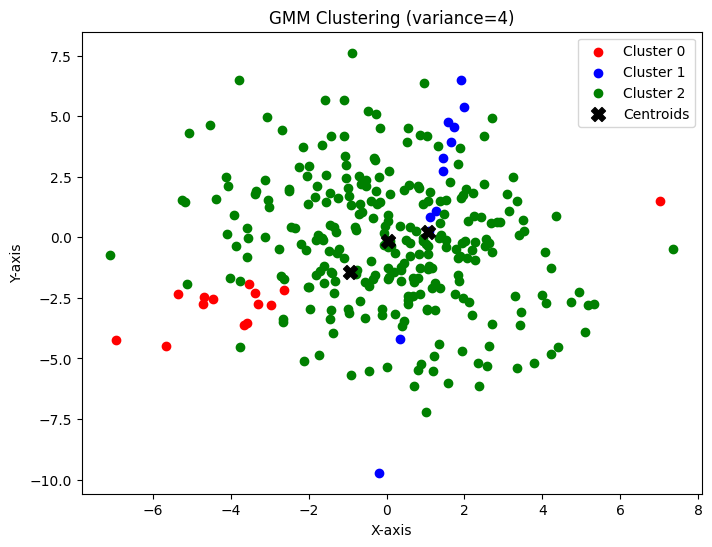

In [57]:
sigma = 4
data = generate_synthetic_data(sigma)
letters = ['a', 'b', 'c']
labels = [l for l in letters for i in range(100)]
gmm = GaussianMixtureModel()
gmm.cluster(3, data[:, 0], data[:, 1])
gmm_means = gmm.get_means()
gmm_labels = np.argmax(gmm.get_probabilities(), axis=1)

plot_custom_clusters_gmm(data, gmm_labels, gmm_means, f'GMM Clustering (variance={sigma})')

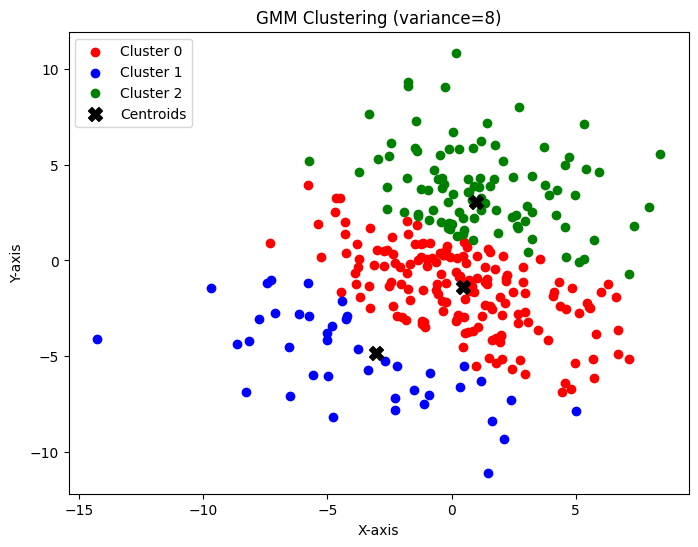

In [58]:
sigma = 8
data = generate_synthetic_data(sigma)
letters = ['a', 'b', 'c']
labels = [l for l in letters for i in range(100)]
gmm = GaussianMixtureModel()
gmm.cluster(3, data[:, 0], data[:, 1])
gmm_means = gmm.get_means()
gmm_labels = np.argmax(gmm.get_probabilities(), axis=1)

plot_custom_clusters_gmm(data, gmm_labels, gmm_means, f'GMM Clustering (variance={sigma})')